In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import json
import ast
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Compare Incremental

In [ ]:
import os
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from src.utils import compute_metrics_for_label

folder_path = "/home/fantoni/patent-sentence-classification/results/incremental"

id2num = {'1': 480, '2': 960, '3': 1440, '4': 1920, '5': 2400, '6': 2880, '7': 3360, '8': 3840, '9': 4320, '10': 4800}

# Compute metrics for bert-for-patents
results = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        
        # Extract sample ID and fold number from filename
        parts = file_name.replace(".xlsx", "").split('_')
        sample_id = parts[1]
        fold_id = parts[2]

        # Load the Excel file into a DataFrame
        df = pd.read_excel(os.path.join(folder_path, file_name))

        # Extract the ground truth and predicted labels
        true_labels = df['sent_tag']
        predicted_labels = df['predicted_tag']

        # Initialize result entry
        result = {
            'Sample Size': id2num[sample_id],
            'Fold': int(fold_id)
        }
        
        # Add per-class precision, recall, and F1-score to the result
        for label in ['All', 'FUN', 'STR', 'MIX', 'OTH']:
            p, r, f1 = compute_metrics_for_label(true_labels, predicted_labels, label=label, average='weighted')
            result[f'Precision_{label}'] = p
            result[f'Recall_{label}'] = r
            result[f'F1-Score_{label}'] = f1

        results.append(result)

results_df = pd.DataFrame(results).sort_values(by=['Sample Size', 'Fold'])
results_df

,Sample Size,Fold,Precision_All,Recall_All,F1-Score_All,Precision_FUN,Recall_FUN,F1-Score_FUN,Precision_STR,Recall_STR,F1-Score_STR,Precision_MIX,Recall_MIX,F1-Score_MIX,Precision_OTH,Recall_OTH,F1-Score_OTH
99,480,1,0.524,0.582,0.519,0.549,0.735,0.629,0.608,0.729,0.663,0.000,0.000,0.000,1.000,0.065,0.122
0,480,2,0.539,0.612,0.560,0.564,0.735,0.639,0.636,0.755,0.691,0.000,0.000,0.000,0.964,0.351,0.514
1,480,3,0.553,0.633,0.581,0.585,0.718,0.645,0.655,0.807,0.723,0.000,0.000,0.000,0.941,0.416,0.577
26,480,4,0.518,0.598,0.543,0.550,0.743,0.632,0.635,0.735,0.681,0.000,0.000,0.000,0.720,0.234,0.353
27,480,5,0.537,0.612,0.562,0.562,0.760,0.646,0.646,0.736,0.688,0.000,0.000,0.000,0.875,0.364,0.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4800,6,0.754,0.757,0.719,0.723,0.854,0.783,0.773,0.910,0.836,0.700,0.119,0.204,0.906,0.623,0.738
95,4800,7,0.757,0.762,0.735,0.706,0.898,0.791,0.843,0.836,0.839,0.653,0.182,0.284,0.670,0.844,0.747
96,4800,8,0.759,0.765,0.744,0.719,0.893,0.797,0.814,0.865,0.839,0.625,0.256,0.363,0.894,0.545,0.677
97,4800,9,0.737,0.753,0.712,0.673,0.920,0.777,0.849,0.841,0.845,0.542,0.074,0.130,0.747,0.805,0.775


## All

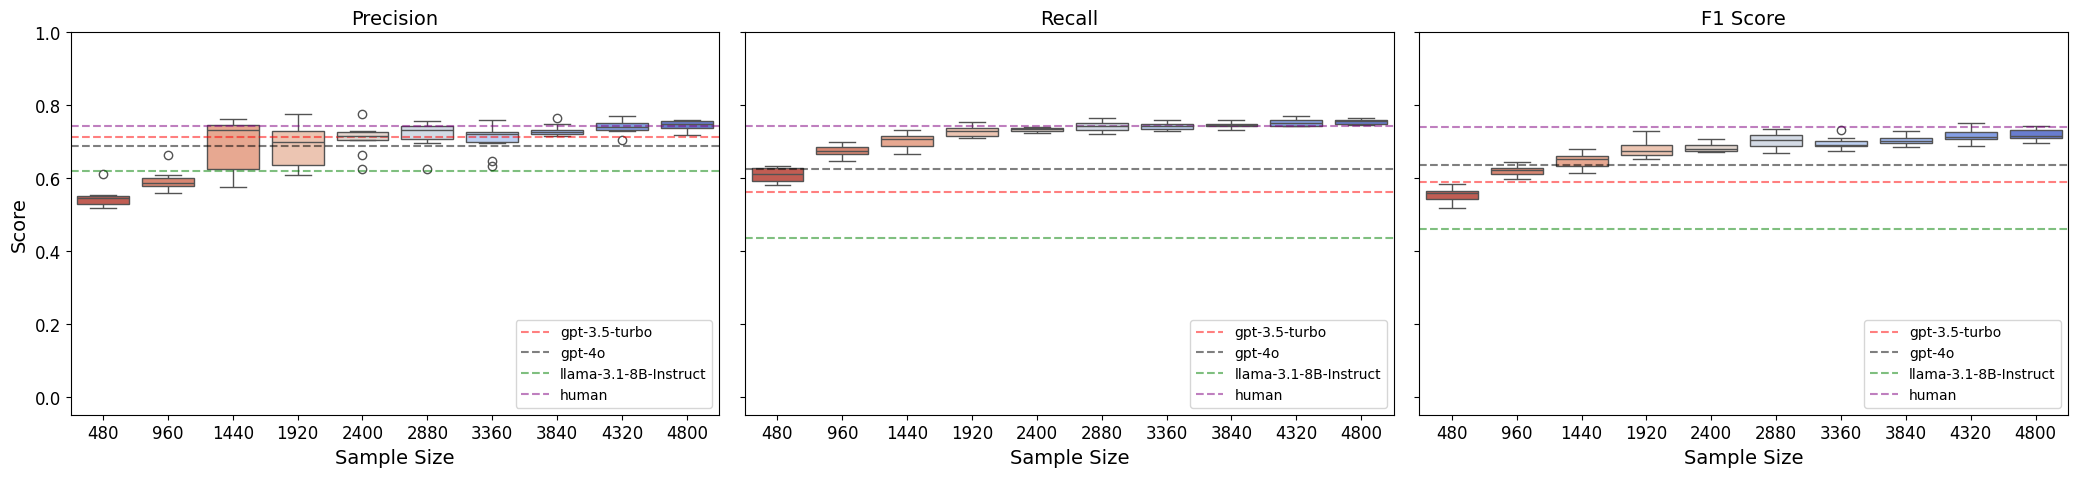

In [14]:
# Import table with all results
df_compare = pd.read_excel('/home/fantoni/patent-sentence-classification/results/comparison_table_classification.xlsx')

# Set plotting parameters
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 10})

# Create subplots
rows = 1 # All
cols = 3 # Precision, Recall, F1
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), sharey=True)

# Define the y-axis limits
y_min = -0.05
y_max = 1

# Get model metrics
# Precision
gpt35_precision = df_compare.query(f"model=='gpt-3.5-turbo'")['precision_All'].iloc[0]
gpt4_precision = df_compare.query(f"model=='gpt-4o'")['precision_All'].iloc[0]
llama_precision = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")['precision_All'].iloc[0]
human_precision = df_compare.query(f"model=='human' ")['precision_All'].iloc[0]

# Recall
gpt35_recall = df_compare.query(f"model=='gpt-3.5-turbo'")['recall_All'].iloc[0]
gpt4_recall = df_compare.query(f"model=='gpt-4o'")['recall_All'].iloc[0]
llama_recall = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")['recall_All'].iloc[0]
human_recall = df_compare.query(f"model=='human' ")['recall_All'].iloc[0]

# F1
gpt35_f1 = df_compare.query(f"model=='gpt-3.5-turbo'")['f1_All'].iloc[0]
gpt4_f1 = df_compare.query(f"model=='gpt-4o'")['f1_All'].iloc[0]
llama_f1 = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")['f1_All'].iloc[0]
human_f1 = df_compare.query(f"model=='human' ")['f1_All'].iloc[0]

# Precision Boxplot
sns.boxplot(x="Sample Size", y="Precision_All", palette="coolwarm_r", data=results_df, ax=axes[0])
axes[0].set_title("Precision")
axes[0].set_ylim(y_min, y_max)
axes[0].set_ylabel("Score")
axes[0].axhline(y=gpt35_precision, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[0].axhline(y=gpt4_precision, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[0].axhline(y=llama_precision, color='green', linestyle='--', linewidth=1.5, label=f"llama-3.1-8B-Instruct", alpha=0.5) 
axes[0].axhline(y=human_precision, color='purple', linestyle='--', linewidth=1.5, label=f"human", alpha=0.5) 
axes[0].legend(loc="lower right")

# Recall Boxplot
sns.boxplot(x="Sample Size", y="Recall_All", palette="coolwarm_r", data=results_df, ax=axes[1])
axes[1].set_title("Recall")
axes[1].set_ylim(y_min, y_max)
axes[1].set_ylabel("")
axes[1].axhline(y=gpt35_recall, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[1].axhline(y=gpt4_recall, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[1].axhline(y=llama_recall, color='green', linestyle='--', linewidth=1.5, label=f"llama-3.1-8B-Instruct", alpha=0.5)
axes[1].axhline(y=human_recall, color='purple', linestyle='--', linewidth=1.5, label=f"human", alpha=0.5) 
axes[1].legend(loc="lower right")

# F1 Score Boxplot
sns.boxplot(x="Sample Size", y="F1-Score_All", palette="coolwarm_r", data=results_df, ax=axes[2])
axes[2].set_title("F1 Score")
axes[2].set_ylim(y_min, y_max)
axes[2].set_ylabel("")
axes[2].axhline(y=gpt35_f1, color='red', linestyle='--', linewidth=1.5, label=f"gpt-3.5-turbo", alpha=0.5) 
axes[2].axhline(y=gpt4_f1, color='black', linestyle='--', linewidth=1.5, label=f"gpt-4o", alpha=0.5) 
axes[2].axhline(y=llama_f1, color='green', linestyle='--', linewidth=1.5, label=f"llama-3.1-8B-Instruct", alpha=0.5)
axes[2].axhline(y=human_f1, color='purple', linestyle='--', linewidth=1.5, label=f"human", alpha=0.5) 
axes[2].legend(loc="lower right")

plt.tight_layout()
plt.show()

## All, FUN, STR, MIX and OTH

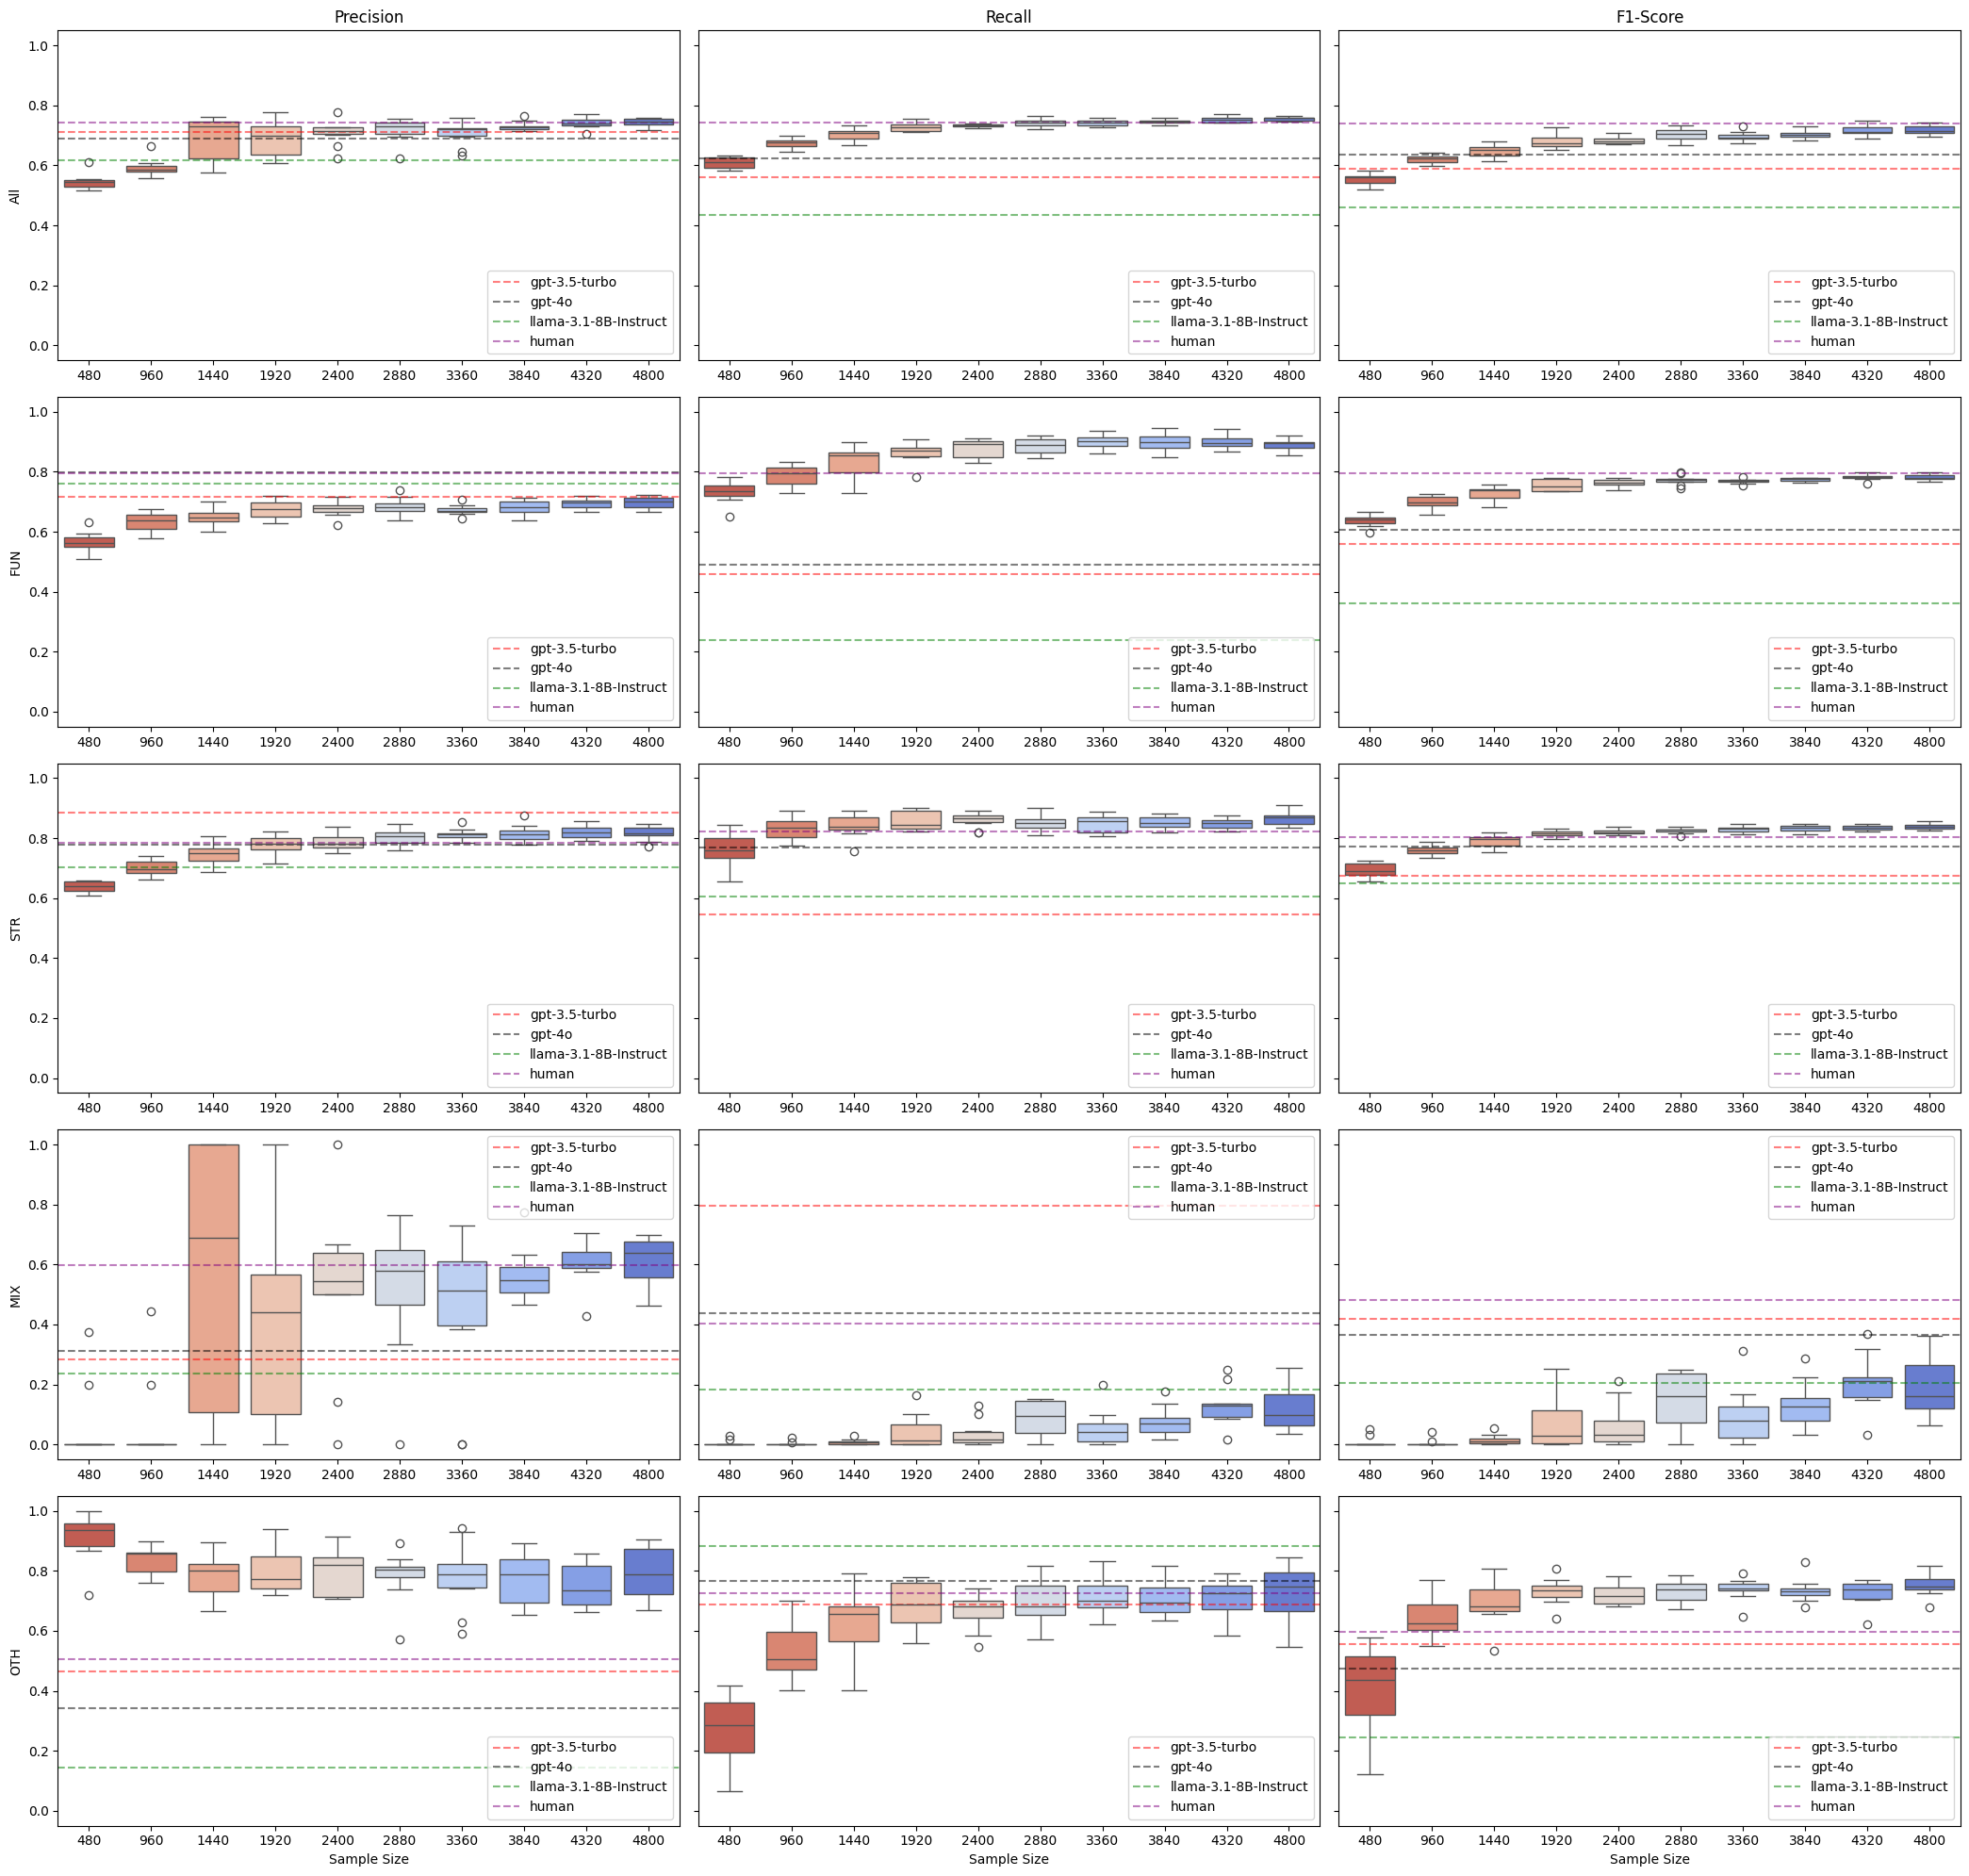

In [ ]:
df_compare = pd.read_excel('/home/fantoni/patent-sentence-classification/results/comparison_table_classification_new.xlsx')

rows = 5 # All, FUN, STR, MIX, OTH
cols = 3 # Precision, Recall, F1
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4 * rows), sharey=True)

y_min = -0.05
y_max = 1.05

for row_idx, mode in enumerate(['All', 'FUN', 'STR', 'MIX', 'OTH']):

    # Get model metrics
    # Precision
    gpt35_precision = df_compare.query(f"model=='gpt-3.5-turbo'")[f'precision_{mode}'].iloc[0]
    gpt4_precision = df_compare.query(f"model=='gpt-4o'")[f'precision_{mode}'].iloc[0]
    llama_precision = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")[f'precision_{mode}'].iloc[0]
    human_precision = df_compare.query(f"model=='human' ")[f'precision_{mode}'].iloc[0]

    # Recall
    gpt35_recall = df_compare.query(f"model=='gpt-3.5-turbo'")[f'recall_{mode}'].iloc[0]
    gpt4_recall = df_compare.query(f"model=='gpt-4o'")[f'recall_{mode}'].iloc[0]
    llama_recall = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")[f'recall_{mode}'].iloc[0]
    human_recall = df_compare.query(f"model=='human' ")[f'recall_{mode}'].iloc[0]

    # F1
    gpt35_f1 = df_compare.query(f"model=='gpt-3.5-turbo'")[f'f1_{mode}'].iloc[0]
    gpt4_f1 = df_compare.query(f"model=='gpt-4o'")[f'f1_{mode}'].iloc[0]
    llama_f1 = df_compare.query(f"model=='Llama-3.1-8B-Instruct'")[f'f1_{mode}'].iloc[0]
    human_f1 = df_compare.query(f"model=='human' ")[f'f1_{mode}'].iloc[0]
    
    # Precision
    sns.boxplot(x="Sample Size", y=f"Precision_{mode}", palette="coolwarm_r", data=results_df, ax=axes[row_idx, 0])
    axes[row_idx, 0].set_title('Precision') if row_idx == 0 else axes[row_idx, 0].set_title('')
    axes[row_idx, 0].set_xlabel('Sample Size') if row_idx == 4 else axes[row_idx, 0].set_xlabel('') 
    axes[row_idx, 0].set_ylim(y_min, y_max)
    axes[row_idx, 0].set_ylabel(mode)
    axes[row_idx, 0].axhline(y=gpt35_precision, color='red', linestyle='--', linewidth=1.5, label="gpt-3.5-turbo", alpha=0.5) 
    axes[row_idx, 0].axhline(y=gpt4_precision, color='black', linestyle='--', linewidth=1.5, label="gpt-4o", alpha=0.5) 
    axes[row_idx, 0].axhline(y=llama_precision, color='green', linestyle='--', linewidth=1.5, label="llama-3.1-8B-Instruct", alpha=0.5) 
    axes[row_idx, 0].axhline(y=human_precision, color='purple', linestyle='--', linewidth=1.5, label="human", alpha=0.5) 
    axes[row_idx, 0].legend(loc="lower right") if mode != 'MIX' else axes[row_idx, 0].legend(loc="upper right")

    # Recall
    sns.boxplot(x="Sample Size", y=f"Recall_{mode}", palette="coolwarm_r", data=results_df, ax=axes[row_idx, 1])
    axes[row_idx, 1].set_title('Recall') if row_idx == 0 else axes[row_idx, 1].set_title('')
    axes[row_idx, 1].set_xlabel('Sample Size') if row_idx == 4 else axes[row_idx, 1].set_xlabel('') 
    axes[row_idx, 1].set_ylim(y_min, y_max)
    axes[row_idx, 1].set_ylabel('')
    axes[row_idx, 1].axhline(y=gpt35_recall, color='red', linestyle='--', linewidth=1.5, label="gpt-3.5-turbo", alpha=0.5) 
    axes[row_idx, 1].axhline(y=gpt4_recall, color='black', linestyle='--', linewidth=1.5, label="gpt-4o", alpha=0.5) 
    axes[row_idx, 1].axhline(y=llama_recall, color='green', linestyle='--', linewidth=1.5, label="llama-3.1-8B-Instruct", alpha=0.5)
    axes[row_idx, 1].axhline(y=human_recall, color='purple', linestyle='--', linewidth=1.5, label="human", alpha=0.5) 
    axes[row_idx, 1].legend(loc="lower right") if mode != 'MIX' else axes[row_idx, 1].legend(loc="upper right")

    # F1-Score
    sns.boxplot(x="Sample Size", y=f'F1-Score_{mode}', palette="coolwarm_r", data=results_df, ax=axes[row_idx, 2])
    axes[row_idx, 2].set_title('F1-Score') if row_idx == 0 else axes[row_idx, 2].set_title('')
    axes[row_idx, 2].set_xlabel('Sample Size') if row_idx == 4 else axes[row_idx, 2].set_xlabel('') 
    axes[row_idx, 2].set_ylim(y_min, y_max)
    axes[row_idx, 2].set_ylabel('')
    axes[row_idx, 2].axhline(y=gpt35_f1, color='red', linestyle='--', linewidth=1.5, label="gpt-3.5-turbo", alpha=0.5) 
    axes[row_idx, 2].axhline(y=gpt4_f1, color='black', linestyle='--', linewidth=1.5, label="gpt-4o", alpha=0.5) 
    axes[row_idx, 2].axhline(y=llama_f1, color='green', linestyle='--', linewidth=1.5, label="llama-3.1-8B-Instruct", alpha=0.5)
    axes[row_idx, 2].axhline(y=human_f1, color='purple', linestyle='--', linewidth=1.5, label="human", alpha=0.5) 
    axes[row_idx, 2].legend(loc="lower right") if mode != 'MIX' else axes[row_idx, 2].legend(loc="upper right")

plt.tight_layout()
plt.show()

# Compare on Agreement - WIP

In [18]:
import os
import pandas as pd
import ast

folder_path = "/home/fantoni/patent-sentence-classification/results/incremental"
id2num = {'1': 480, '2': 960, '3': 1440, '4': 1920, '5': 2400, '6': 2880, '7': 3360, '8': 3840, '9': 4320, '10': 4800}

# Import agreement data
agreement_df = pd.read_excel("/home/fantoni/patent-sentence-classification/data/1200_agreement_All.xlsx", usecols=['sent_id', 'agreement'])

# Process all files
results_all = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        sample_id = file_name.split('_')[1]
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path)

        # Merge with agreement data
        df = pd.merge(df, agreement_df, on='sent_id', how='left')

        # Compute correct predictions
        df['correct'] = df['sent_class'] == df['predicted_class']
        
        # Extract max probabilities
        df["probabilities"] = df["probabilities"].apply(ast.literal_eval) # import as a list
        df['max_prob'] = df['probabilities'].apply(max)
        
        # Collect data 
        data = {
            'Sample Size': id2num[sample_id],
            'max_prob': df['max_prob'].tolist(),
            'agreement': df['agreement'].tolist(),
            'correct': df['correct'].tolist()
        }

        results_all.append(data)

# Convert and explode DataFrame
results_df = pd.DataFrame(results_all).sort_values(by='Sample Size')
results_df = results_df.explode(['max_prob', 'agreement', 'correct']).reset_index(drop=True)
results_df

,Sample Size,max_prob,agreement,correct
0,480,0.5,False,False
1,480,0.61,True,True
2,480,0.49,False,True
3,480,0.53,True,True
4,480,0.38,True,True
...,...,...,...,...
119995,4800,0.65,False,False
119996,4800,0.73,True,True
119997,4800,0.94,True,True
119998,4800,0.88,False,True


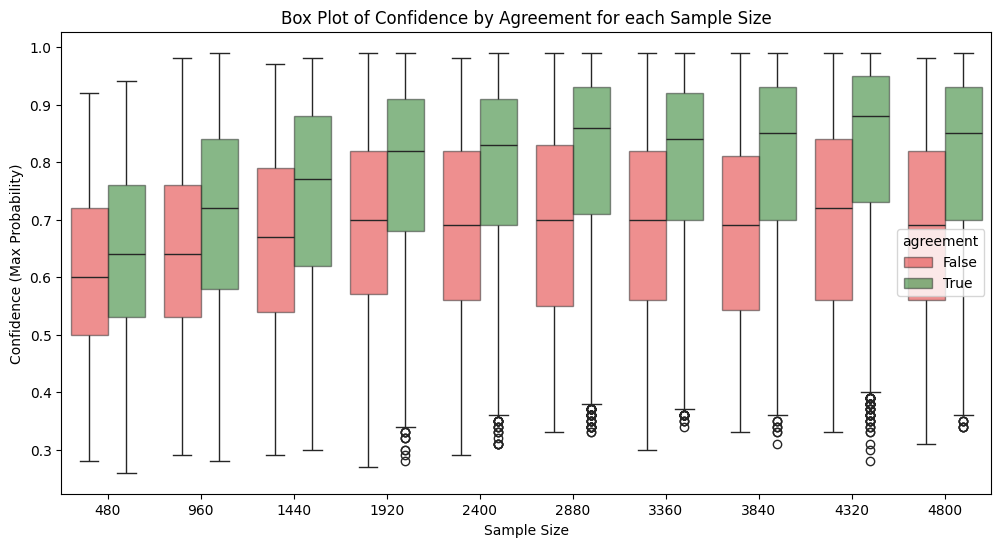

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'max_prob' by 'agreement', grouped by 'Sample Size'
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_df,
    x='Sample Size',
    y='max_prob',
    hue='agreement',
    palette={True: 'green', False: 'red'},
    boxprops=dict(alpha=0.5))
    
plt.xlabel("Sample Size")
plt.ylabel("Confidence (Max Probability)")
plt.title("Box Plot of Confidence by Agreement for each Sample Size")
plt.show()

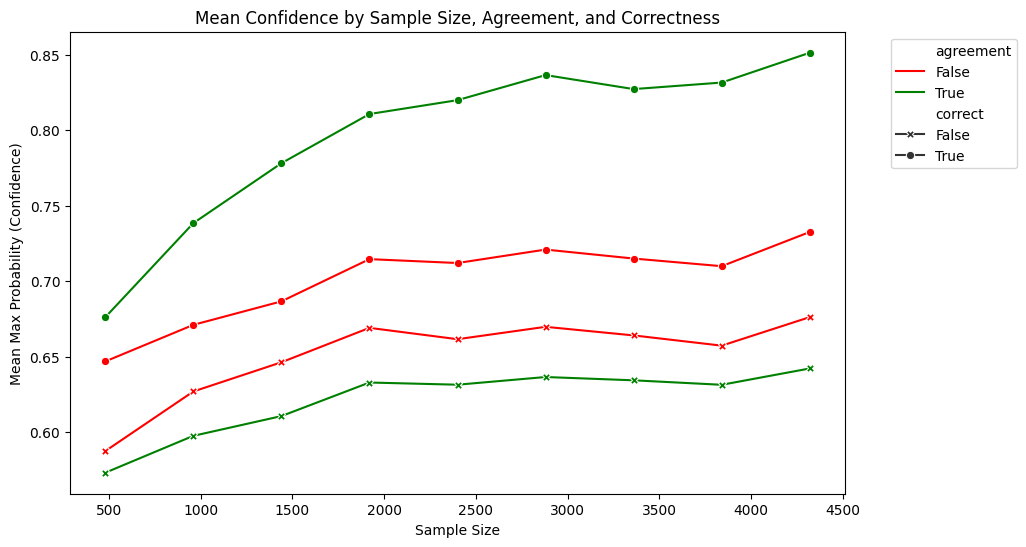

In [86]:
# Compute mean max_prob grouped by 'Sample Size' and 'Agreement' and 'Correct'
mean_df = exploded_df.groupby(['Sample Size', 'agreement', 'correct'])['max_prob'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=mean_df,
    x="Sample Size",
    y="max_prob",
    hue="agreement",
    style="correct",
    markers={True: "o", False: "X"},  # Marker style for 'correct'
    dashes=False,  # Use solid lines
    palette={True: "green", False: "red"}  # Color mapping
)

plt.xlabel("Sample Size")
plt.ylabel("Mean Max Probability (Confidence)")
plt.title("Mean Confidence by Sample Size, Agreement, and Correctness")
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()